<a href="https://colab.research.google.com/github/shahbashajahan/disease_predictionn/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,6]
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [5]:
df.shape

(349, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [7]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

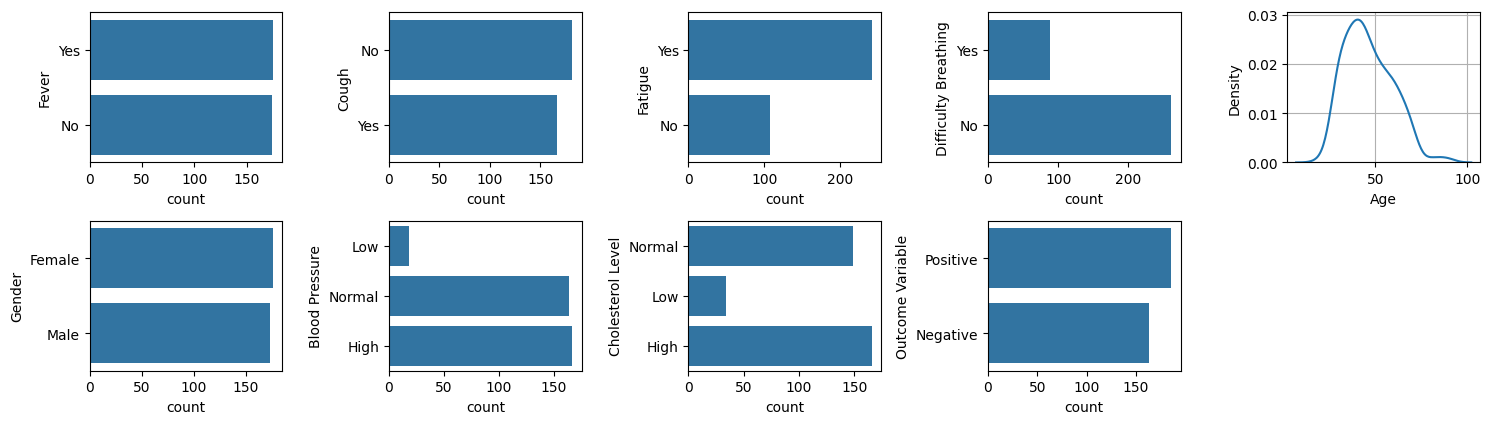

In [8]:
r=3
c=5
it=1
for i in df.drop('Disease',axis=1).columns:
    plt.subplot(r,c,it)
    if df[i].dtype=='object':
        sns.countplot(y=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [9]:
for i in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']:
    df[i] = df[i].replace({'Yes':1,'No':0})

In [10]:
for i in ['Blood Pressure', 'Cholesterol Level']:
    df[i] = df[i].replace({'Low':1,'Normal':2,'High':3})

In [11]:
df['Outcome Variable'] = df['Outcome Variable'].replace({'Positive':1,'Negative':0})
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

In [12]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mmax = MinMaxScaler()

In [15]:
df[['Age']] = mmax.fit_transform(df[['Age']])

In [16]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,0.000000,0,1,2,1
1,Common Cold,0,1,1,0,0.084507,0,2,2,0
2,Eczema,0,1,1,0,0.084507,0,2,2,0
3,Asthma,1,1,0,1,0.084507,1,2,2,1
4,Asthma,1,1,0,1,0.084507,1,2,2,1


In [17]:
y = df['Outcome Variable']
x = df[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age','Gender', 'Blood Pressure', 'Cholesterol Level']]

In [18]:
import statsmodels.api as sm

In [19]:
xc = sm.add_constant(x)
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.597186
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Outcome Variable   No. Observations:                  349
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                            8
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.1357
Time:                        12:22:03   Log-Likelihood:                -208.42
converged:                       True   LL-Null:                       -241.15
Covariance Type:            nonrobust   LLR p-value:                 3.907e-11
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.3948      0.678     -5.005      0.000      -4.724      -2.065

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [25]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(xtrain,ytrain)
    y_pred_train = model_name.predict(xtrain)
    y_pred_test = model_name.predict(xtest)
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))
    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.grid()
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))
    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.grid()
    plt.show()

For the LogisticRegression()
The TRAIN accuracy is 0.7336065573770492
The ROC score for TRAIN data is 0.730603302999663


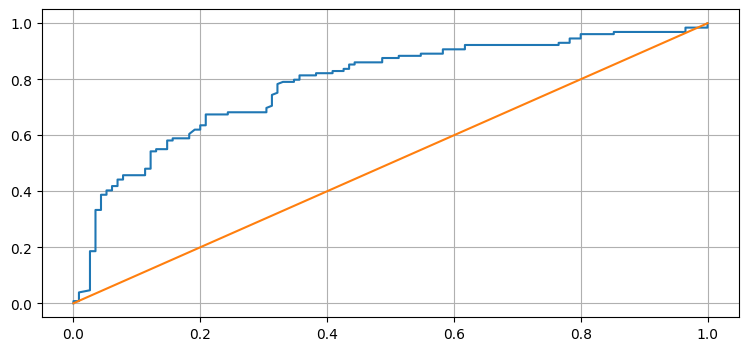

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.5904761904761905
The ROC score for TEST data is 0.5800438596491229


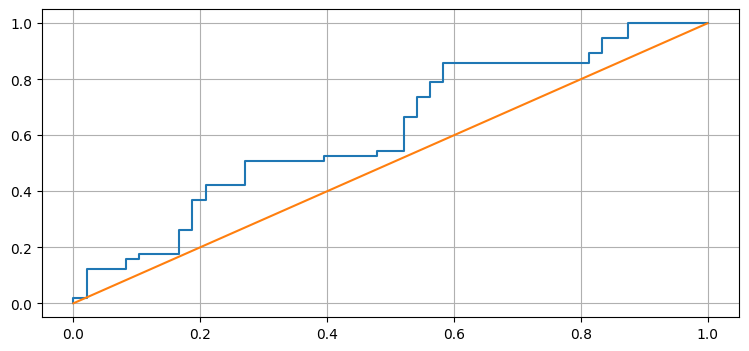

In [26]:
predictor(lr)

For the DecisionTreeClassifier()
The TRAIN accuracy is 0.9795081967213115
The ROC score for TRAIN data is 0.9801482979440513


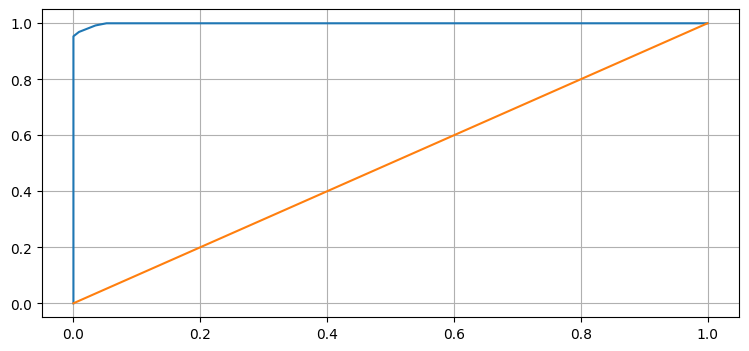

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.6952380952380952
The ROC score for TEST data is 0.7012061403508771


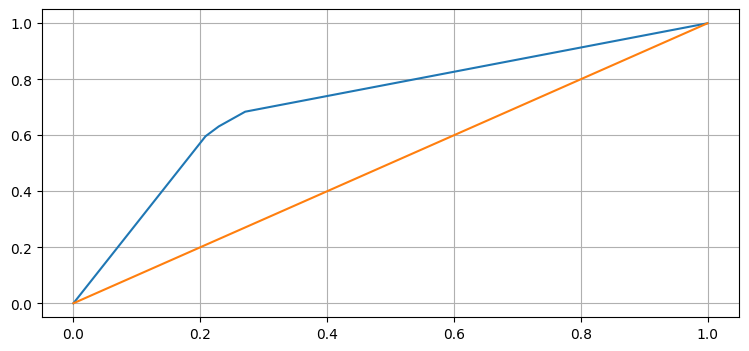

In [28]:
predictor(dt)

For the RandomForestClassifier()
The TRAIN accuracy is 0.9795081967213115
The ROC score for TRAIN data is 0.9796764408493427


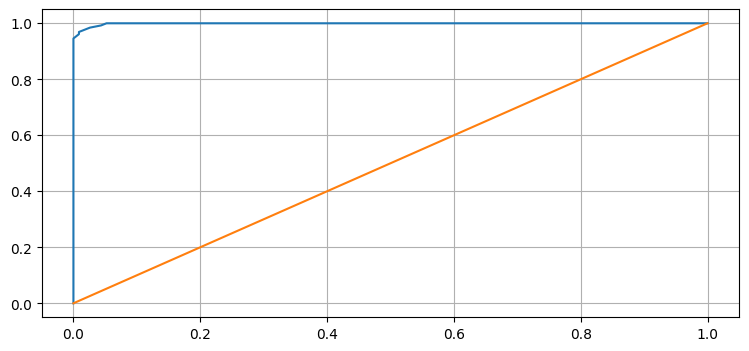

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7523809523809524
The ROC score for TEST data is 0.7521929824561404


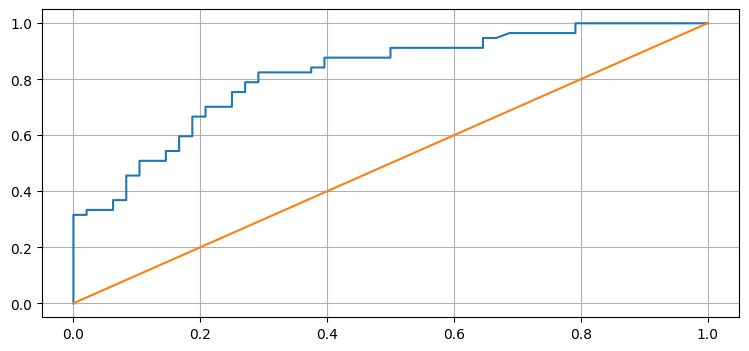

In [29]:
predictor(rf)

For the KNeighborsClassifier()
The TRAIN accuracy is 0.7991803278688525
The ROC score for TRAIN data is 0.7978092349174251


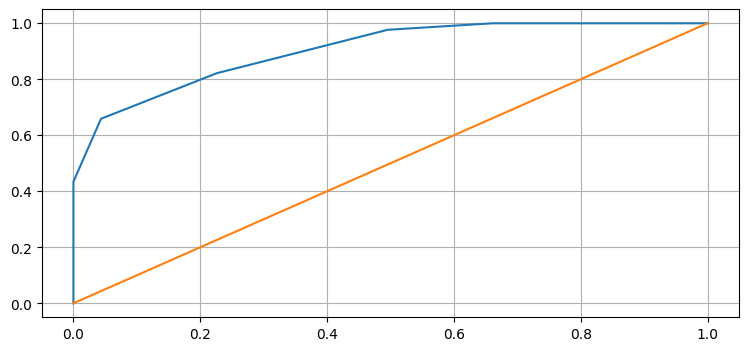

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.6857142857142857
The ROC score for TEST data is 0.6776315789473684


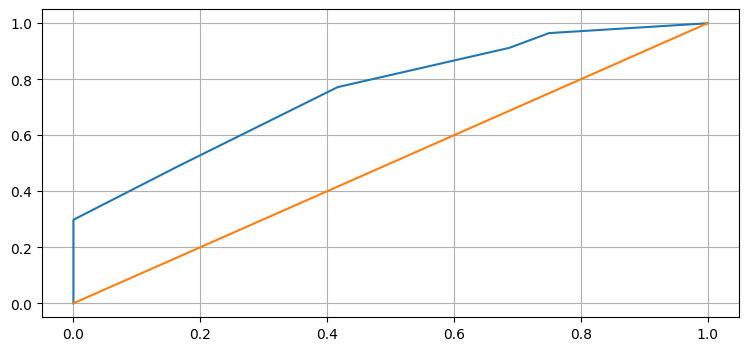

In [30]:
predictor(knn)

For the GaussianNB()
The TRAIN accuracy is 0.7008196721311475
The ROC score for TRAIN data is 0.7000674081563869


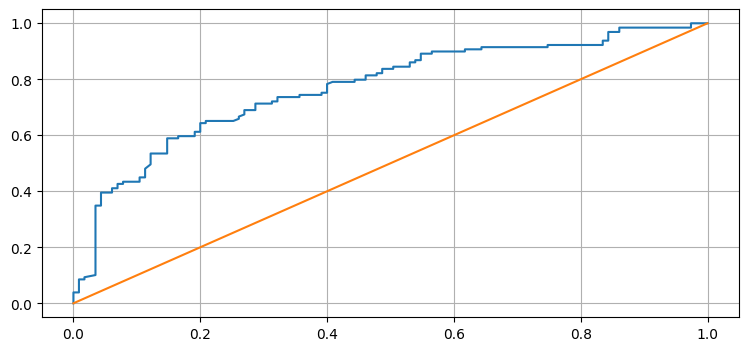

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.5523809523809524
The ROC score for TEST data is 0.5416666666666666


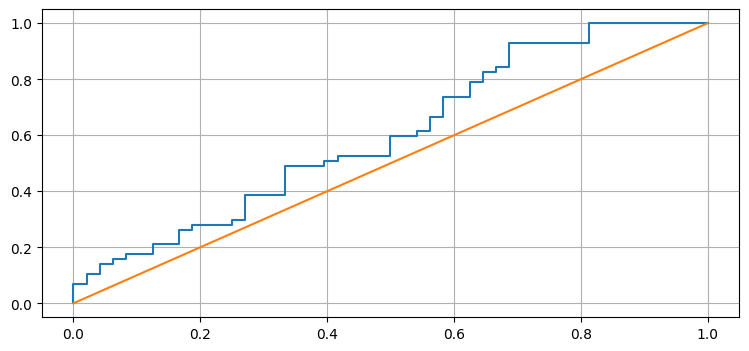

In [31]:
predictor(gnb)

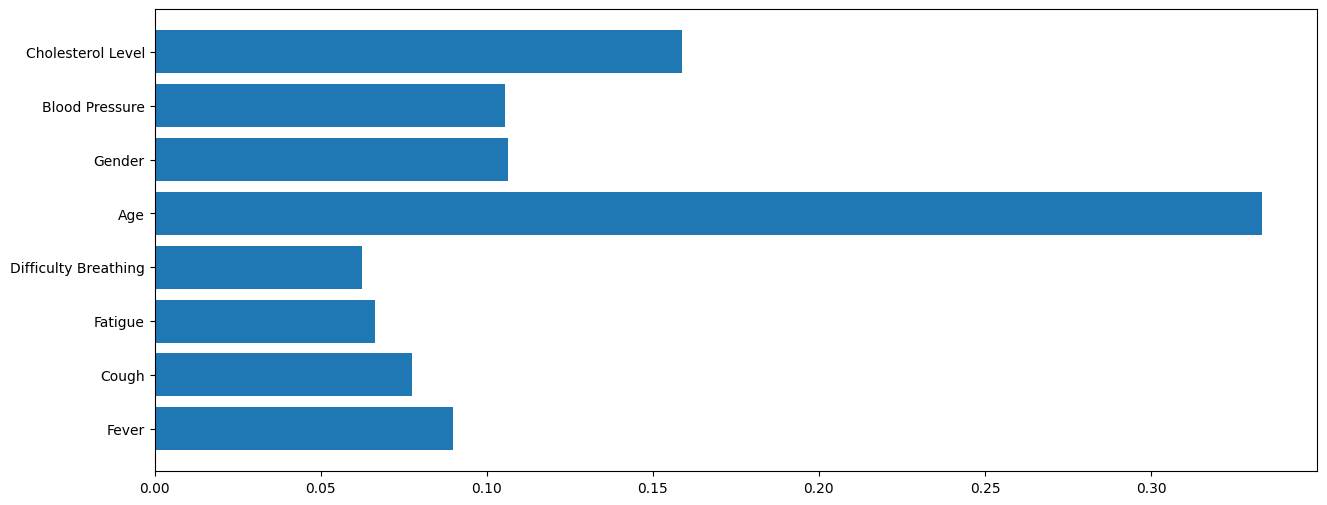

In [32]:
plt.barh(xtrain.columns,rf.fit(xtrain,ytrain).feature_importances_)
plt.show()